                                                                                      NOTEBOOK 1: Exploratory Data Analysis

                                                             2nd Machine Learning Project - start2impact - Davide Miglietta

# California Housing: House Price Prediction

The scope of this project is to predict the median price house in the various California's blocks. A block group is a geographical unit (with a population tipically from 600 to 3000) containing Census data. In other words it is a district.

The dataset comes from the 1990 US Census.


Sources:

https://drive.google.com/file/d/1klA604Sc8M84g8ybkCLY8bTTm9iEIyDc/view

https://scikit-learn.org/stable/datasets/real_world.html#california-housing-dataset

http://lib.stat.cmu.edu/datasets/

https://www.kaggle.com/camnugent/california-housing-prices


#### The Analysis has been splitted in three notebooks for better clarity. 
* In the first (the current one) it has been performed an exploratory data analysis. Features have been explored, data plotted and insights have been looked for. 
* After that, in the second notebook, various Machine Learning models have been compared to find the most perfroming one for regression prediction.
* In the third, a classification of the maxs have been introducted to improve predictions.

### Dataset features are:

1. **longitude:** block longitude (higher values: farther west)

2. **latitude:** block latitude (higher values: farther north)

3. **housing_median_agee:** median age of block houses (the higher the value, the older the houses)

4. **total_rooms:** total rooms in a block

5. **total_bedrooms:** total bedrooms in a block

6. **population:** block population

7. **households:** total households (a group of people living in a home unit, for example: a family)

8. **median_income:** household median income (10,000 US Dollars)

9. **ocean_proximity:** house location respect to the ocean (categorical)

10. **median_house_value:** median house value (US Dollars) --> **TARGET**













## Table of contents:
1. [Libraries](#Libraries)

2. [Dataset import](#Dataset_import)

3. [Data Exploration](#Data_Exploration)

4. [Data_Visualization](#Data_Visualization)

5. [Data_Manipulation_and_Outliers](#Data_Manipulation_and_Outliers)
    
6. [Geographical_Considerations](#Geographical_Considerations)
    
7. [Conclusions](#Conclusions)

### Libraries

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

### Dataset_import

In [2]:
CH_df = pd.read_csv('housing.csv')
CH_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


### Data_Exploration

In [3]:
#check presence of null values and feature types
print(CH_df.info())

CH_df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB
None


longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [4]:
#statistical characteristic of the numerical features
CH_df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


count         20640
unique            5
top       <1H OCEAN
freq           9136
Name: ocean_proximity, dtype: object

 ['NEAR BAY' '<1H OCEAN' 'INLAND' 'NEAR OCEAN' 'ISLAND']

 <1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64


<AxesSubplot:>

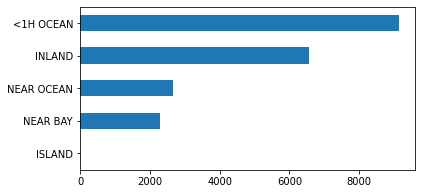

In [5]:
#let'se explore also the only categorical variable
print(CH_df['ocean_proximity'].describe())
print('\n', CH_df['ocean_proximity'].unique())
print('\n', CH_df['ocean_proximity'].value_counts())

CH_df['ocean_proximity'].value_counts(ascending = True).plot.barh(figsize=(6,3))

Blocks that are located on the Island (see geographical analysis for further information) are only 5; several magnitude orders less than the others. This could be hold in consideration for the analysis.

#### What to do with null values?

In [6]:
#creating dfs of the rows that contains and don't contains null values, for an easier camparation
nulls = CH_df[CH_df['total_bedrooms'].isnull()]
not_nulls = CH_df[CH_df['total_bedrooms'].notnull()]

In [7]:
nulls.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,207.000000,207.000000,207.000000,207.000000,0.0,207.000000,207.000000,207.000000,207.000000
mean,-119.472560,35.497633,29.270531,2562.603865,NaN,1477.772947,510.024155,3.822244,206007.280193
std,2.001424,2.097298,11.964927,1787.269789,NaN,1057.448212,386.120704,1.955595,111638.214545
min,-124.130000,32.660000,4.000000,154.000000,NaN,37.000000,16.000000,0.852700,45800.000000
25%,-121.810000,33.970000,19.000000,1307.500000,NaN,781.000000,258.000000,2.564150,128750.000000
50%,-118.490000,34.200000,30.000000,2155.000000,NaN,1217.000000,427.000000,3.411500,175000.000000
75%,-117.985000,37.495000,38.000000,3465.000000,NaN,1889.500000,628.000000,4.615750,267700.000000
max,-114.590000,40.920000,52.000000,11709.000000,NaN,7604.000000,3589.000000,15.000100,500001.000000


In [8]:
not_nulls.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000
mean,-119.570689,35.633221,28.633094,2636.504233,537.870553,1424.946949,499.433465,3.871162,206864.413155
std,2.003578,2.136348,12.591805,2185.269567,421.385070,1133.208490,382.299226,1.899291,115435.667099
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1450.000000,296.000000,787.000000,280.000000,2.563700,119500.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.536500,179700.000000
75%,-118.010000,37.720000,37.000000,3143.000000,647.000000,1722.000000,604.000000,4.744000,264700.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [9]:
print('**********ROWS WITH NULL VALUES:**********\n')
print(nulls['ocean_proximity'].describe())
print('\n', nulls['ocean_proximity'].unique())
print('\n', nulls['ocean_proximity'].value_counts())

print('\n**********ROWS WITHOUT NULL VALUES:**********\n')
print(not_nulls['ocean_proximity'].describe())
print('\n', not_nulls['ocean_proximity'].unique())
print('\n', not_nulls['ocean_proximity'].value_counts())

**********ROWS WITH NULL VALUES:**********

count           207
unique            4
top       <1H OCEAN
freq            102
Name: ocean_proximity, dtype: object

 ['NEAR BAY' 'INLAND' 'NEAR OCEAN' '<1H OCEAN']

 <1H OCEAN     102
INLAND         55
NEAR OCEAN     30
NEAR BAY       20
Name: ocean_proximity, dtype: int64

**********ROWS WITHOUT NULL VALUES:**********

count         20433
unique            5
top       <1H OCEAN
freq           9034
Name: ocean_proximity, dtype: object

 ['NEAR BAY' '<1H OCEAN' 'INLAND' 'NEAR OCEAN' 'ISLAND']

 <1H OCEAN     9034
INLAND        6496
NEAR OCEAN    2628
NEAR BAY      2270
ISLAND           5
Name: ocean_proximity, dtype: int64


In [10]:
'''
There are few possibilities for dealing with null values: 
For example, drop the rows containing the null values or the entire feature.
Also, it is possible to substitute the null values with a measure, such as the median.

In this case, we are using this last option. 
This because the missing values are a relative small amount of data (only found in one feature and 207 rows out of 20,640).

Even more important: 
they seem to be missing in a random way and not folowing a specific pattern: for example, for specific blocks with low income (statistical descriptions are very similar, as shown above)
or within a specific geographical area.

The following lines of code have been commented out because have been used to check the geographical randomness of the blocks 
containing null values. The plots obtained are actually maps of California as wil be explained later.
At this point, it is not really of interest shows those, but the code is reported for completeness.
'''

'''
sns.set(rc={'figure.figsize':(5,5)})
sns.scatterplot(data = nulls, x = 'longitude', y = 'latitude', 
                hue = 'ocean_proximity', palette = 'tab10')
'''

'''
fig, (ax1, ax2) =  plt.subplots(1,2, figsize = (15,5))


nulls.plot.scatter(x='longitude', y='latitude', subplots = True, ax=ax1,
                   s = nulls["population"] / 100, c = nulls['median_income'] * 1e4, colormap = 'viridis')

nulls.plot.scatter(x='longitude', y='latitude', subplots = True, ax=ax2,
                   s=nulls["population"]/100, c='median_house_value', colormap='plasma')

'''

#substituting null values in 'total_bedrooms' with median value of the corresponding 'ocean_proximity' group
CH_df['total_bedrooms'].fillna(CH_df.groupby('ocean_proximity')['total_bedrooms'].transform('median'), inplace = True)

CH_df.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

### Data_Visualization

Target Distribution:

[[]]

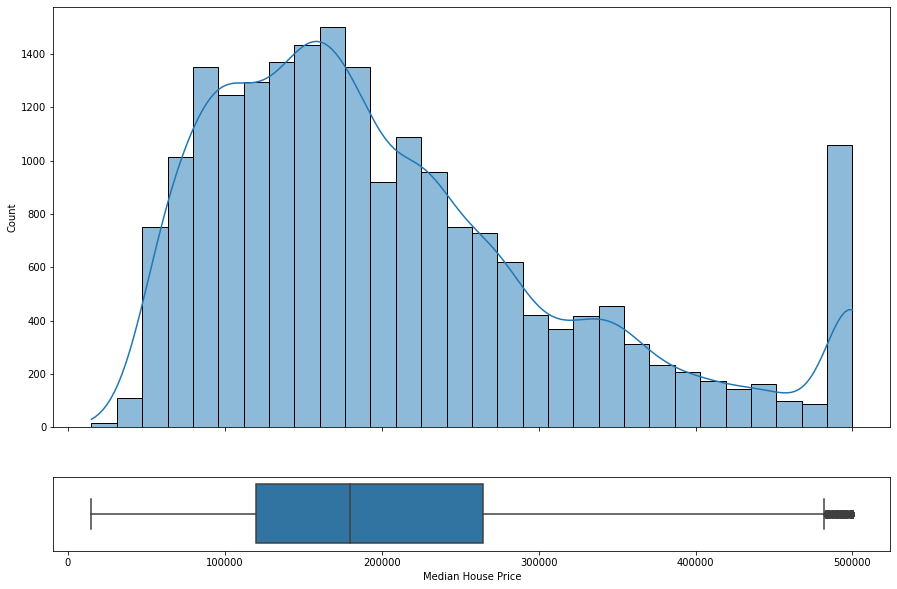

In [11]:
#setting figure and axes: 1 figure, 2 sublots sharing x axis

fig, (ax_hist, ax_box) = plt.subplots(2, sharex=True, figsize = (15,10),  
                                    gridspec_kw={"height_ratios": (.85, .15)})


sns.histplot(data = CH_df['median_house_value'], bins=30, kde=True, ax=ax_hist)
sns.boxplot(data = CH_df['median_house_value'], orient = 'h', ax=ax_box)

ax_hist.set( ylabel='Count')
ax_box.set(xlabel='Median House Price')

#remove y ticks for boxplot
ax_box.set(yticks=[])

In [12]:
print(CH_df['median_house_value'].value_counts(),'\n')
print(CH_df[CH_df['median_house_value'] == 500001.0].shape)
print ( '{:.2f} %'.format( (CH_df[CH_df['median_house_value'] == 500001.0].shape[0] / CH_df.shape[0] ) * 100) )

CH_df[CH_df['median_house_value'] == 500001.0].head(3)

500001.0    965
137500.0    122
162500.0    117
112500.0    103
187500.0     93
           ... 
243700.0      1
454800.0      1
290200.0      1
486800.0      1
289700.0      1
Name: median_house_value, Length: 3842, dtype: int64 

(965, 10)
4.68 %


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
89,-122.27,37.80,52.0,249.0,78.0,396.0,85.0,1.2434,500001.0,NEAR BAY
459,-122.25,37.87,52.0,609.0,236.0,1349.0,250.0,1.1696,500001.0,NEAR BAY
493,-122.24,37.86,52.0,1668.0,225.0,517.0,214.0,7.8521,500001.0,NEAR BAY


From the plot we gain a first important insight: the median house price distribution is right skewed and **present a considerable number (965 --> 4.68 % of the total) of values with a median house value of 501,000,000 US Dollars.**

This big number of high values deserves some considerations:
* It is peculiar that there are so many district with the exact same value: this may means that this is not a "real value" but something like a "Maximum".
* This can bring noise to the models that we will try to develop, in case this will happen, an option could be to treat it separately.

Features Pairplot:

In [13]:
#sns.pairplot(CH_df, hue ='ocean_proximity', palette= 'tab10')
#plt.savefig('CH_pairplot.png')

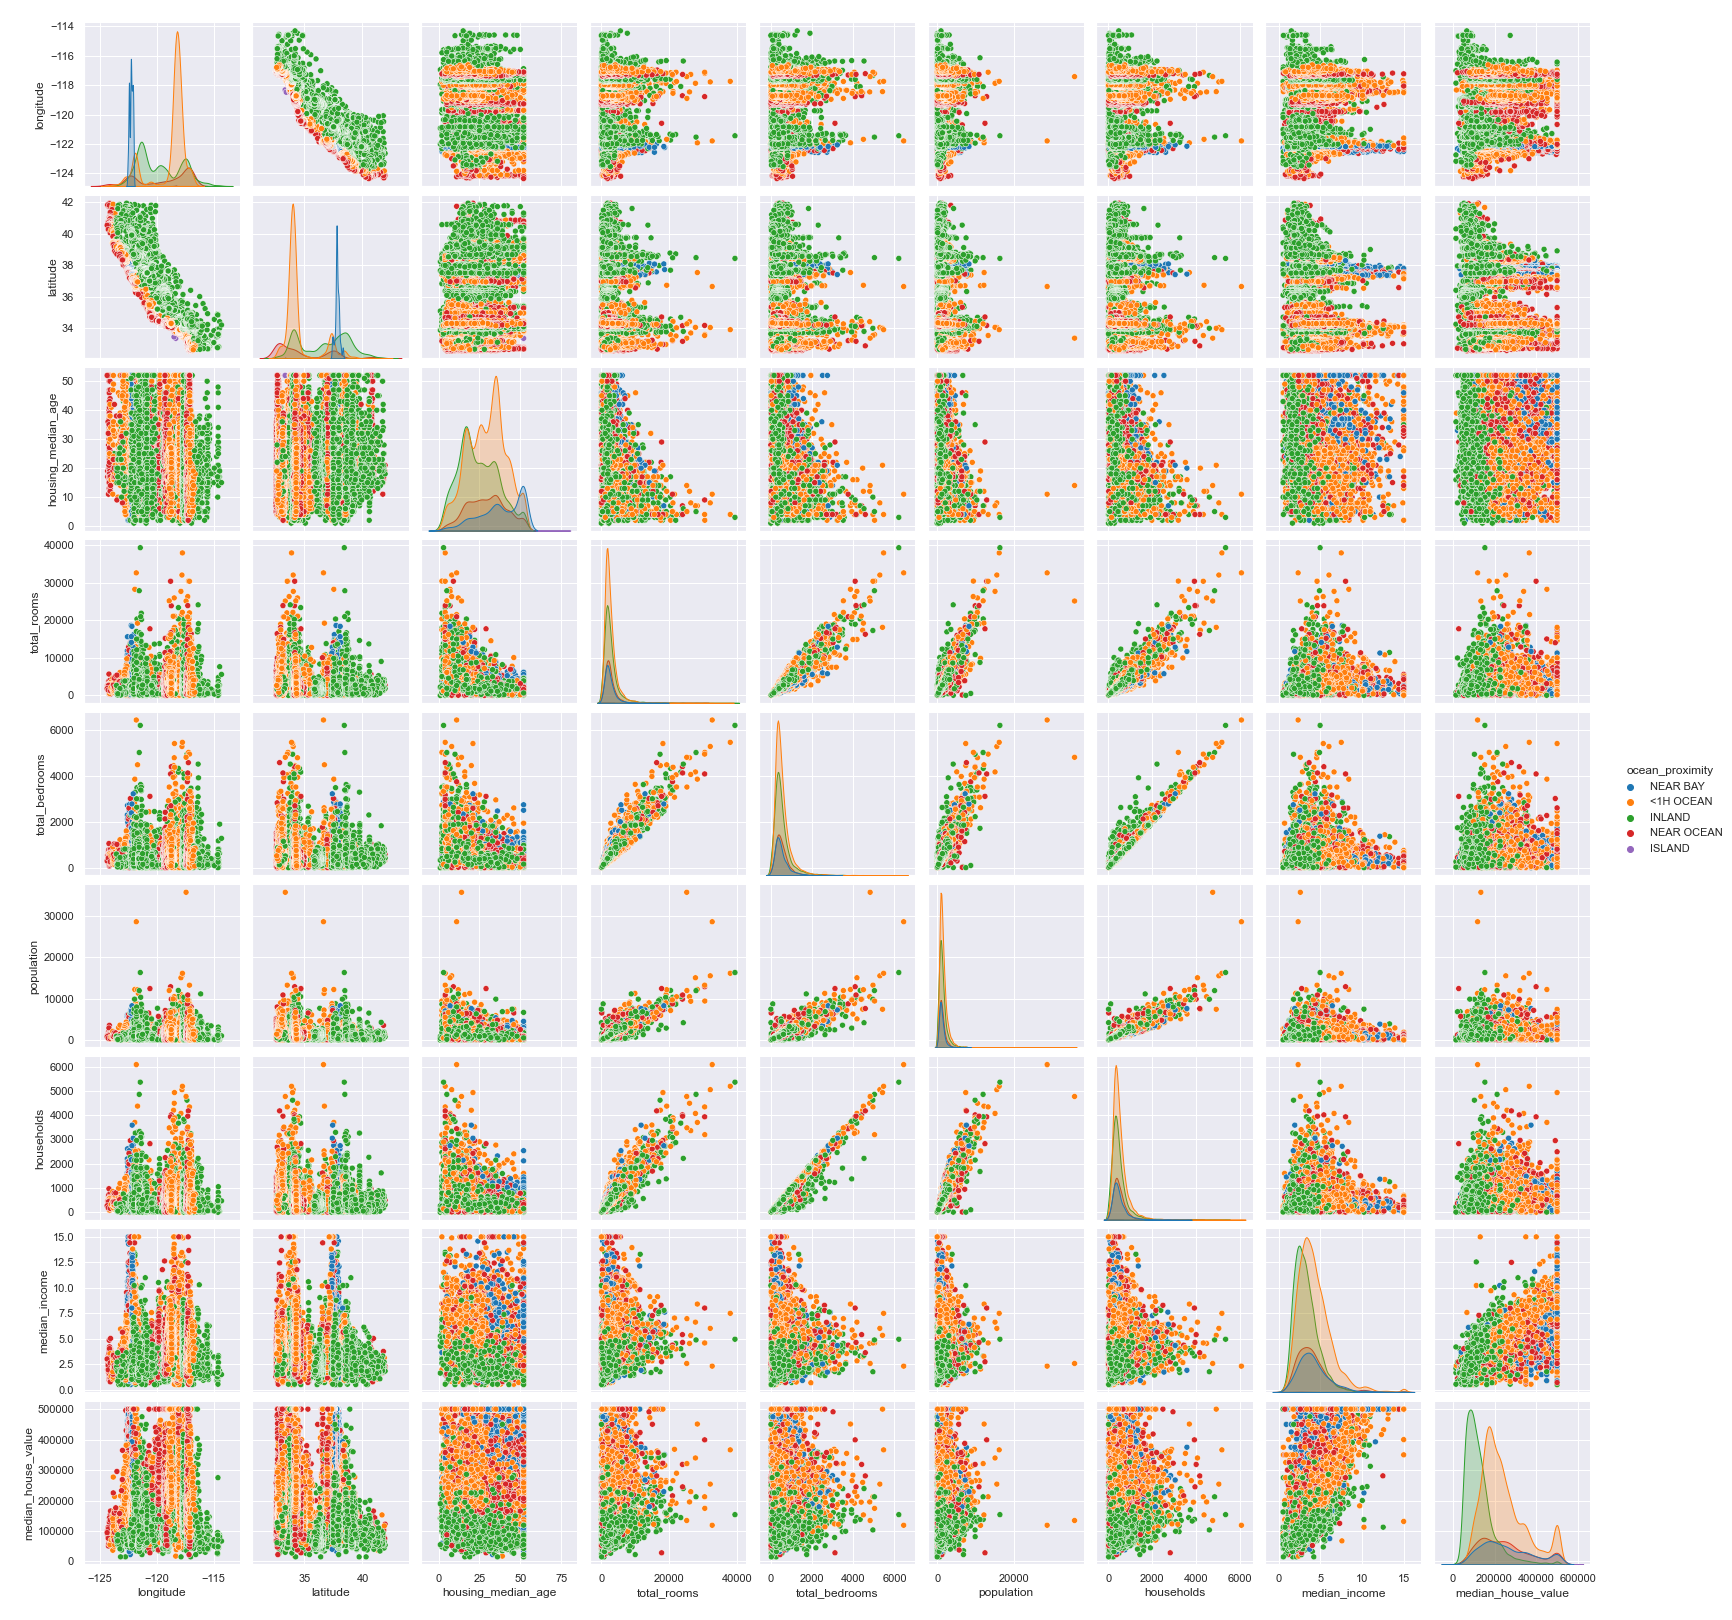

**Main insights visible from the scatterplot are:**
* Median House Prices are generally lower from inland blocks (green dots)
* Generally 'median_income' and 'median_house_value' are correlated: if one increases, also the other does
* 'total_rooms', 'total_bedrooms', 'population' and 'households' appear to be strictly linear correlated. In general, it makes sense: more people --> more households --> more houses --> more rooms and viceversa.
* plotting latitude and longitude we can see California shape, but we'll talk about that more in detail later on.

Linear Correlation between Features:

<AxesSubplot:>

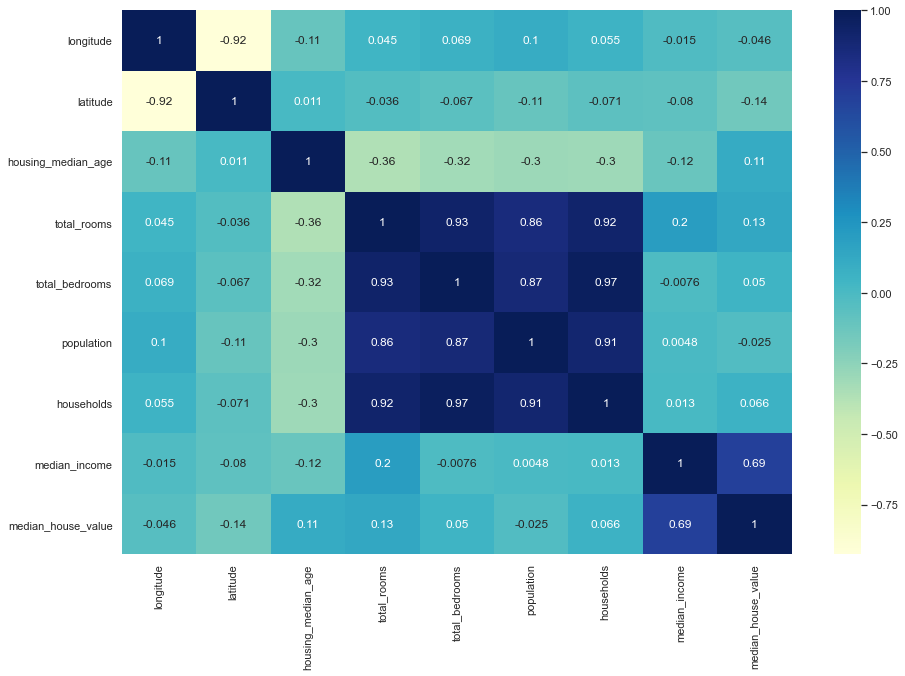

In [14]:
sns.set(rc={'figure.figsize':(15,10)})
sns.heatmap(CH_df.corr(), annot = True, cmap = 'YlGnBu')

**From  the heatmap we can confirm linear correlation between:**
* 'median_income' and 'median_house_value'
* 'total_rooms', 'total_bedrooms', 'population' and 'households' 

as seen in the pairplot. And also:

* 'latitude' and 'longitude' due to the State shape

#### Features Distributions and Boxplots:

array([[<AxesSubplot:title={'center':'housing_median_age'}>,
        <AxesSubplot:title={'center':'total_rooms'}>],
       [<AxesSubplot:title={'center':'total_bedrooms'}>,
        <AxesSubplot:title={'center':'population'}>],
       [<AxesSubplot:title={'center':'households'}>,
        <AxesSubplot:title={'center':'median_income'}>]], dtype=object)

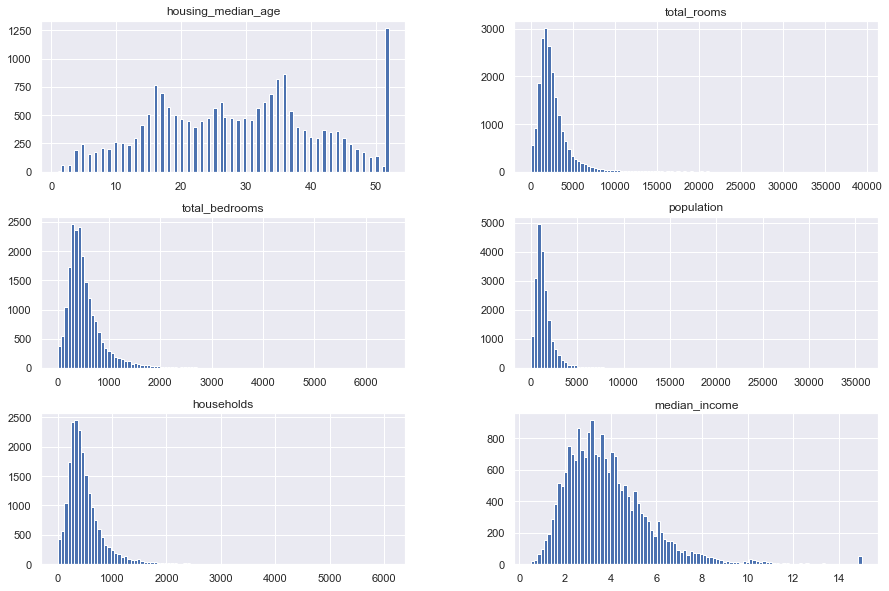

In [15]:
CH_df.iloc[:, 2:-2].hist(figsize = (15,10), bins=100)

**With focus on the 'housing_median_age':**

Seems to be a similar scenario to the 'median_house_values' observed before.

An unusual high number -of 52 years- catches our attention because:
* Many blocks present this value
* It is the maximum for the feature: but most likely there are blocks with older houses. Somehow 52 is the 'max' that has been inserted in the datset.

It could bring noise to our models and we'll have special consideration for this. 

52.0


<AxesSubplot:>

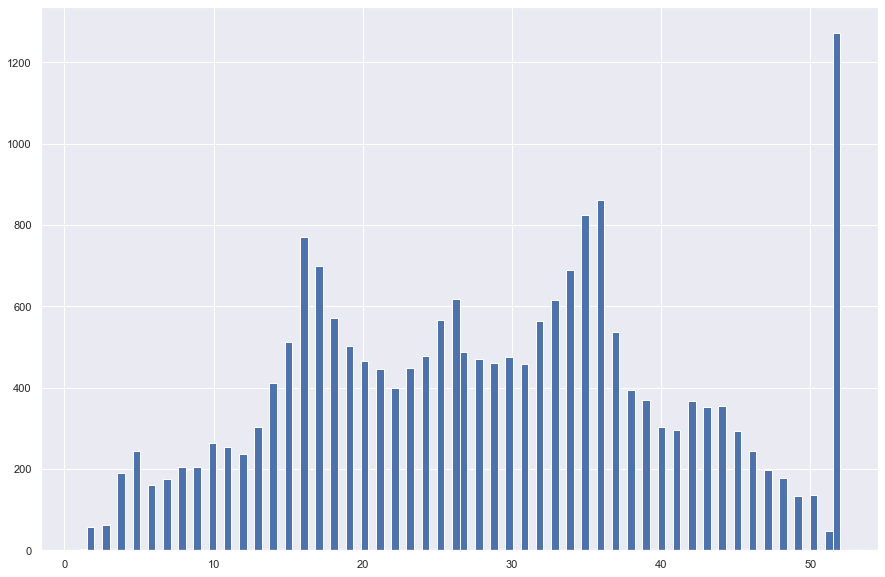

In [16]:
print(CH_df['housing_median_age'].max())
CH_df['housing_median_age'].hist(bins=100)

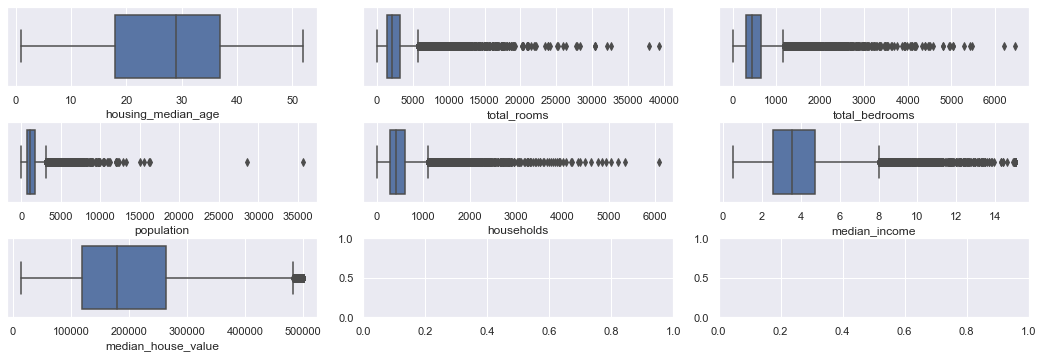

In [17]:
fig, axes = plt.subplots(ncols = 3, nrows = 3, figsize = (15,5))
fig.tight_layout()
    
for col, ax in zip(CH_df.columns[2:-1], axes.flat):
    sns.boxplot(x = col, data = CH_df, orient = 'h', ax = ax)
plt.show()

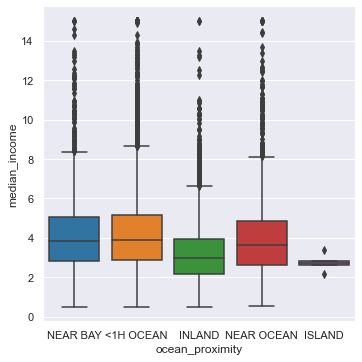

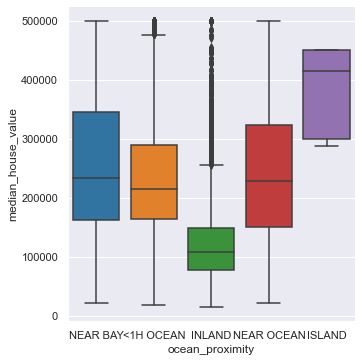

In [18]:
for col in ['median_income', 'median_house_value']:
    sns.catplot(data = CH_df, x = 'ocean_proximity', y = col, kind = 'box', palette= 'tab10')

**With focus on 'median_income' and 'median_house_value':**

- We can observe that the areas 'NEAR BAY', '<1H OCEAN' and 'NEAR OCEAN' have similar median values and distributions.

- While 'ISLAND' and 'INLAD' deserve separate observations:
    * both have slighlty lower median 'median_income' values than the previous three
    * median 'median_house_value' has very different behaviour compared to the other three: considerably higher for 'ISLAND' and considerably lower for 'INLAND'
    * as previoulsy noted 'ISLAND' has only five examples while the others have several thousands examples

In [19]:
'''
With focus on island blocks:
Later on, if -from geographical coordinates- we individuate that, the example we have to predict, is actually an island block,
we could use as a 'prediction' simply the mean or the median value of the 'median_house_value'.
'''

print('Mean: ', CH_df[CH_df['ocean_proximity'] == 'ISLAND']['median_house_value'].mean())
print('Median: ', CH_df[CH_df['ocean_proximity'] == 'ISLAND']['median_house_value'].median())
CH_df[CH_df['ocean_proximity'] == 'ISLAND']

Mean:  380440.0
Median:  414700.0


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
8314,-118.32,33.35,27.0,1675.0,521.0,744.0,331.0,2.1579,450000.0,ISLAND
8315,-118.33,33.34,52.0,2359.0,591.0,1100.0,431.0,2.8333,414700.0,ISLAND
8316,-118.32,33.33,52.0,2127.0,512.0,733.0,288.0,3.3906,300000.0,ISLAND
8317,-118.32,33.34,52.0,996.0,264.0,341.0,160.0,2.7361,450000.0,ISLAND
8318,-118.48,33.43,29.0,716.0,214.0,422.0,173.0,2.6042,287500.0,ISLAND


### Data_Manipulation_and_Outliers

#### Some considerations on 'population', 'total rooms', 'total bedrooms' and 'households':

- It could be really useful for our analysis combine together these features; for example, calculating the average number of people in a household or the number of rooms (kind of indicator of how big houses are) for each household.

array([[<AxesSubplot:title={'center':'population'}>,
        <AxesSubplot:title={'center':'households'}>],
       [<AxesSubplot:title={'center':'total_rooms'}>,
        <AxesSubplot:title={'center':'total_bedrooms'}>]], dtype=object)

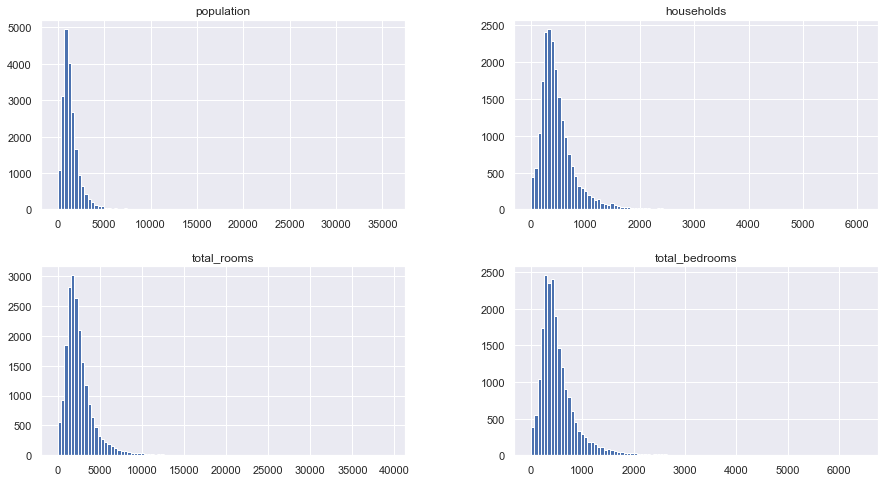

In [20]:
#let's see again their distributions:
CH_df[[ 'population', 'households', 'total_rooms', 'total_bedrooms']].hist(bins=100, figsize = (15,8))

Let's procede with the calculations introduced before:

In [21]:
#average size of a household
CH_df['avg_household_size'] = CH_df['population'] / CH_df['households']

#average number of rooms per house (house-size indicator)
CH_df['avg_rooms_per_house'] = CH_df['total_rooms'] / CH_df['households']

#ratio "day rooms / bedrooms" --> day rooms: living, studio, kitchen...  
CH_df['ratio_dayrooms_bedrooms'] = ( CH_df['total_rooms'] - CH_df['total_bedrooms'] ) / CH_df['total_bedrooms']

#number of rooms available for each person 
#(< 1: people usually share bedrooms, > 1: there are extra-bedrooms in the house)
CH_df['bedrooms_per_person'] = CH_df['total_bedrooms'] / CH_df['population']



array([[<AxesSubplot:title={'center':'avg_household_size'}>,
        <AxesSubplot:title={'center':'avg_rooms_per_house'}>],
       [<AxesSubplot:title={'center':'ratio_dayrooms_bedrooms'}>,
        <AxesSubplot:title={'center':'bedrooms_per_person'}>]],
      dtype=object)

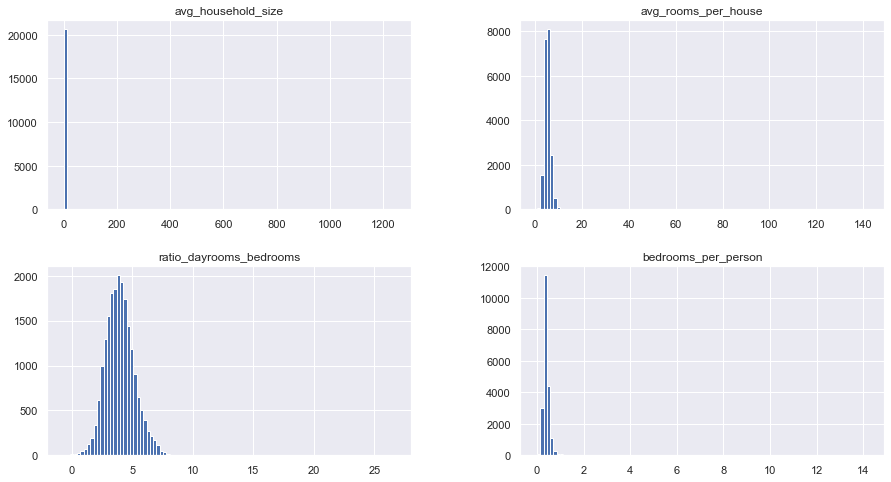

In [22]:
#check what we have obtained:
CH_df[['avg_household_size', 'avg_rooms_per_house', 'ratio_dayrooms_bedrooms', 'bedrooms_per_person']].hist(bins=100, figsize = (15,8))

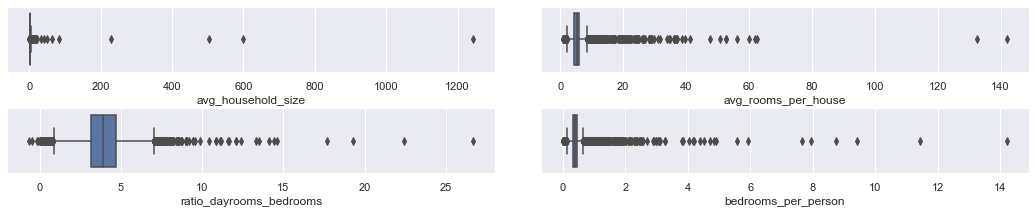

In [23]:
fig, axes = plt.subplots(ncols = 2, nrows = 2, figsize = (15,3))
fig.tight_layout()
    
for col, ax in zip(CH_df[['avg_household_size', 'avg_rooms_per_house', 'ratio_dayrooms_bedrooms', 'bedrooms_per_person']], axes.flat):
    sns.boxplot(x = col, data = CH_df, orient = 'h', ax = ax)
plt.show()

**Extreme Outliers:**

Especially from the boxplot we can see many "strange" values. 

For exampe: an 'average household_size' of 200 people is not really possible and so on.

With focus on 'avg_household_size':

In [24]:
'''
An household of 8 / 9 people it can be still possible, for very numerous families. 
But the higher the value, the more probable are errors in the dataset. 
For instance, in line 3364 the 'avg_household_size' is 599.71, coming from a 'population'of 4198 and only 7 'households'.

This, and others like this, are likely mistakes in the data.
'''
print(CH_df[CH_df['avg_household_size'] > 10].shape)
print(CH_df['avg_household_size'].median())

CH_df[CH_df['avg_household_size'] > 10]
#CH_df[CH_df['avg_household_size'] < 1]

(37, 14)
2.818115654360196


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,avg_household_size,avg_rooms_per_house,ratio_dayrooms_bedrooms,bedrooms_per_person
91,-122.28,37.80,52.0,215.0,87.0,904.0,88.0,0.8668,137500.0,NEAR BAY,10.272727,2.443182,1.471264,0.096239
270,-122.18,37.78,33.0,142.0,31.0,575.0,47.0,3.8750,225000.0,NEAR BAY,12.234043,3.021277,3.580645,0.053913
1039,-120.97,38.42,16.0,1748.0,322.0,4930.0,287.0,4.3029,121900.0,INLAND,17.177700,6.090592,4.428571,0.065314
1067,-121.85,39.73,52.0,444.0,80.0,1107.0,98.0,3.4191,137500.0,INLAND,11.295918,4.530612,4.550000,0.072267
1617,-122.08,37.84,17.0,1320.0,159.0,1722.0,141.0,11.7064,500001.0,NEAR BAY,12.212766,9.361702,7.301887,0.092334
2511,-119.54,36.51,36.0,49.0,7.0,28.0,2.0,4.6250,162500.0,INLAND,14.000000,24.500000,6.000000,0.250000
2723,-115.50,32.75,13.0,330.0,72.0,822.0,64.0,3.4107,142500.0,INLAND,12.843750,5.156250,3.583333,0.087591
2899,-119.01,35.37,35.0,120.0,35.0,477.0,41.0,1.9125,47500.0,INLAND,11.634146,2.926829,2.428571,0.073375
3364,-120.51,40.41,36.0,36.0,8.0,4198.0,7.0,5.5179,67500.0,INLAND,599.714286,5.142857,3.500000,0.001906
4479,-118.16,34.07,41.0,247.0,55.0,925.0,50.0,3.5769,135700.0,<1H OCEAN,18.500000,4.940000,3.490909,0.059459


For 'avg_household_size':
* it has been decided that for values > 10, they will be dropped from the dataset
* Also, values < 1 are considered mistakes, since in a household should be composed at least by one person.

In [25]:
'''
Similarly, values that don't seem to be plausible are:
* > 25 'avg_rooms_per_house'
* > 10 and < 0.3 for 'ratio_dayrooms_bedrooms'
* > 5 'bedrooms_per_person'

'''

#CH_df[CH_df['avg_rooms_per_house'] > 25]
#CH_df[CH_df['ratio_dayrooms_bedrooms'] > 10]
#CH_df[CH_df['ratio_dayrooms_bedrooms'] < 0.3]
CH_df[CH_df['bedrooms_per_person'] > 5]


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,avg_household_size,avg_rooms_per_house,ratio_dayrooms_bedrooms,bedrooms_per_person
1102,-121.54,40.06,17.0,858.0,262.0,47.0,27.0,2.4028,67500.0,INLAND,1.740741,31.777778,2.274809,5.574468
1914,-120.10,38.91,33.0,1561.0,282.0,30.0,11.0,1.8750,500001.0,INLAND,2.727273,141.909091,4.535461,9.400000
1979,-120.08,38.80,34.0,1988.0,511.0,36.0,15.0,4.6250,162500.0,INLAND,2.400000,132.533333,2.890411,14.194444
2395,-119.34,37.12,23.0,1881.0,380.0,64.0,37.0,3.8750,125000.0,INLAND,1.729730,50.837838,3.950000,5.937500
2826,-119.11,35.42,52.0,154.0,423.0,37.0,16.0,10.0263,200000.0,INLAND,2.312500,9.625000,-0.635934,11.432432
11849,-121.00,39.75,8.0,1116.0,214.0,27.0,39.0,2.5893,83000.0,INLAND,0.692308,28.615385,4.214953,7.925926
11862,-121.25,40.27,25.0,958.0,245.0,28.0,16.0,2.6250,67500.0,INLAND,1.750000,59.875000,2.910204,8.750000
12447,-114.49,33.97,17.0,2809.0,635.0,83.0,45.0,1.6154,87500.0,INLAND,1.844444,62.422222,3.423622,7.650602


In [26]:
subset_extreme_outliers = [CH_df[CH_df['avg_household_size'] > 10],
                           CH_df[CH_df['avg_household_size'] < 1],
                           CH_df[CH_df['avg_rooms_per_house'] > 25], 
                           CH_df[CH_df['ratio_dayrooms_bedrooms'] > 10],
                           CH_df[CH_df['ratio_dayrooms_bedrooms'] < 0.3],
                           CH_df[CH_df['bedrooms_per_person'] > 5] ]

Creating a datfarame containing information about those 'extreme outliers':

In [27]:
extreme_outliers = pd.DataFrame(columns = CH_df.columns)
extreme_outliers = extreme_outliers.append(subset_extreme_outliers)
extreme_outliers

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,avg_household_size,avg_rooms_per_house,ratio_dayrooms_bedrooms,bedrooms_per_person
91,-122.28,37.80,52.0,215.0,87.0,904.0,88.0,0.8668,137500.0,NEAR BAY,10.272727,2.443182,1.471264,0.096239
270,-122.18,37.78,33.0,142.0,31.0,575.0,47.0,3.8750,225000.0,NEAR BAY,12.234043,3.021277,3.580645,0.053913
1039,-120.97,38.42,16.0,1748.0,322.0,4930.0,287.0,4.3029,121900.0,INLAND,17.177700,6.090592,4.428571,0.065314
1067,-121.85,39.73,52.0,444.0,80.0,1107.0,98.0,3.4191,137500.0,INLAND,11.295918,4.530612,4.550000,0.072267
1617,-122.08,37.84,17.0,1320.0,159.0,1722.0,141.0,11.7064,500001.0,NEAR BAY,12.212766,9.361702,7.301887,0.092334
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2395,-119.34,37.12,23.0,1881.0,380.0,64.0,37.0,3.8750,125000.0,INLAND,1.729730,50.837838,3.950000,5.937500
2826,-119.11,35.42,52.0,154.0,423.0,37.0,16.0,10.0263,200000.0,INLAND,2.312500,9.625000,-0.635934,11.432432
11849,-121.00,39.75,8.0,1116.0,214.0,27.0,39.0,2.5893,83000.0,INLAND,0.692308,28.615385,4.214953,7.925926
11862,-121.25,40.27,25.0,958.0,245.0,28.0,16.0,2.6250,67500.0,INLAND,1.750000,59.875000,2.910204,8.750000


<AxesSubplot:xlabel='longitude', ylabel='latitude'>

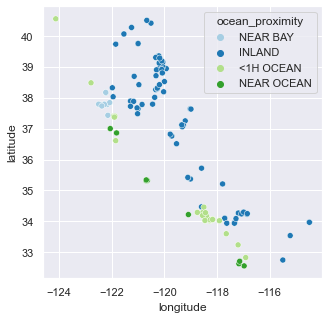

In [28]:
'''
Plotting latitude and longitude we can verify if, for example,
the outliers are concentrated in speficic geographical areas. But no particular distribution is visible.
'''

sns.set(rc={'figure.figsize':(5,5)})
sns.scatterplot(data = extreme_outliers, x = 'longitude', y = 'latitude', 
                hue = 'ocean_proximity', palette = 'Paired')

In [29]:
'''
So, the examples containing the indicated values will be dropped from the dataset.
'''

print(CH_df.shape)
before = CH_df.shape[0]

ind = extreme_outliers.index
CH_df.drop(index=ind , inplace = True)

print(CH_df.shape)
after = CH_df.shape[0]

print('Dropped from the dataset: {} rows'.format(before - after))

(20640, 14)
(20525, 14)
Dropped from the dataset: 115 rows


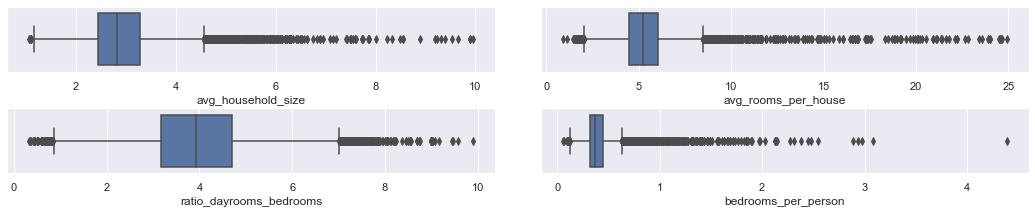

In [30]:
fig, axes = plt.subplots(ncols = 2, nrows = 2, figsize = (15,3))
fig.tight_layout()
    
for col, ax in zip(CH_df[['avg_household_size', 'avg_rooms_per_house', 'ratio_dayrooms_bedrooms', 'bedrooms_per_person']], axes.flat):
    sns.boxplot(x = col, data = CH_df, orient = 'h', ax = ax)
plt.show()

### Geographical_Considerations

In [31]:
'''
The following lines of code take some time to run. 
To see the map, open the html file 'California_Map.html' attached (LINK BELOW).
'''

"\nThe following lines of code take some time to run. \nTo see the map, open the html file 'California_Map.html' attached (LINK BELOW).\n"

<a href='California_Map.html'>+++++ CALIFORNIA MAP+++++</a>

In [32]:

'''#PLOTTING A MAP OF CALIFORNIA, WITH MARKERS INDICATING BLOCKS SUPERIMPOSE 

from geopy.geocoders import Nominatim # convert an address into latitude and longitude values
import folium # map rendering library
import matplotlib.colors as mcolors


#saving correlation between tableu colors and numerical variables
#--> needed for plotting markers in different colors and be coherent with previous visualizations

#dir(mcolors)
#print(mcolors.TABLEAU_COLORS)
tableu_colors = list(mcolors.TABLEAU_COLORS.values())

op_dict = {}

for i in range(len(CH_df['ocean_proximity'].unique())):
    op_dict[CH_df['ocean_proximity'].unique()[i]] = tableu_colors[i]
    
#print(op_dict)


#from Nominatim we can convert an address into latitude and longitude values
#to use for initialize California Map

address = 'California, USA'

geolocator = Nominatim(user_agent = 'MI_explorer')
location = geolocator.geocode(address)
lat = location.latitude
long = location.longitude
#print('The geograpical coordinates of {} are {}, {}.'.format(address, lat, long))


#California Map with Folium
California_Map = folium.Map(location = [lat, long], zoom_start = 5.5) #map initialization

for lat, lon, oc_pr in zip(CH_df['latitude'], CH_df['longitude'], CH_df['ocean_proximity']):
    
    #circle markers with color corresponding to ocean_proximity, click on the marker to see popup label 
    folium.CircleMarker(
        [lat, lon],
        radius = 2,
        popup = folium.Popup(oc_pr),
        color = op_dict[oc_pr]).add_to(California_Map)

California_Map.save('California_Map.html')

California_Map
'''


"#PLOTTING A MAP OF CALIFORNIA, WITH MARKERS INDICATING BLOCKS SUPERIMPOSE \n\nfrom geopy.geocoders import Nominatim # convert an address into latitude and longitude values\nimport folium # map rendering library\nimport matplotlib.colors as mcolors\n\n\n#saving correlation between tableu colors and numerical variables\n#--> needed for plotting markers in different colors and be coherent with previous visualizations\n\n#dir(mcolors)\n#print(mcolors.TABLEAU_COLORS)\ntableu_colors = list(mcolors.TABLEAU_COLORS.values())\n\nop_dict = {}\n\nfor i in range(len(CH_df['ocean_proximity'].unique())):\n    op_dict[CH_df['ocean_proximity'].unique()[i]] = tableu_colors[i]\n    \n#print(op_dict)\n\n\n#from Nominatim we can convert an address into latitude and longitude values\n#to use for initialize California Map\n\naddress = 'California, USA'\n\ngeolocator = Nominatim(user_agent = 'MI_explorer')\nlocation = geolocator.geocode(address)\nlat = location.latitude\nlong = location.longitude\n#print('Th

The obtained California Map shows that also the folowing plots corresponds to a map of California, as one could expect. 

However, the interactive map has been created to confirm the validity of the given geographical coordinates and shows a map tho whom may not be familiar with the state geography.

Also the 'ocean_proximity' labels are shown. 
Even though they are very self explicative one could confirm that, they are actualy correct ('NEAR OCEAN' is effectively close to the sea and so on) and also disover new insights; for example, 'NEAR BAY' means near 'San Francisco Bay' that it may be not that obvious for some.

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

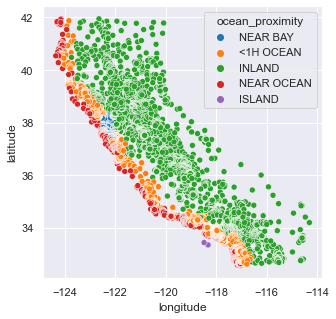

In [33]:
sns.set(rc={'figure.figsize':(5,5)})
sns.scatterplot(data = CH_df, x = 'longitude', y = 'latitude', 
                hue = 'ocean_proximity', palette = 'tab10')

Text(0, 0.5, 'Median House Value [$]')

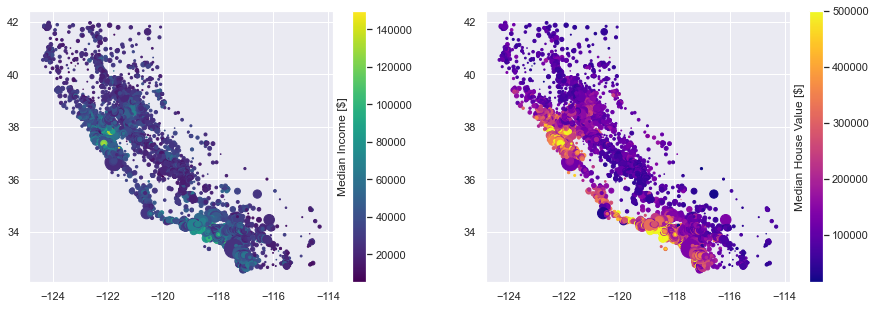

In [34]:
fig, (ax1, ax2) =  plt.subplots(1,2, figsize = (15,5))


CH_df.plot.scatter(x = 'longitude', y = 'latitude', subplots = True, ax = ax1,
                   s = CH_df['population'] / 100, c = CH_df['median_income'] * 1e4, colormap = 'viridis')

ax1.set_xlabel('')
ax1.yaxis.set_label_position('right')
ax1.set_ylabel('Median Income [$]')


CH_df.plot.scatter(x='longitude', y='latitude', subplots = True, ax=ax2,
                   s=CH_df['population']/100, c=CH_df['median_house_value'], colormap='plasma')

ax2.set_xlabel('')
ax2.yaxis.set_label_position('right')
ax2.set_ylabel('Median House Value [$]')

From these maps, we can clearly confirm that blocks with higher median income have also higher median house prices.

In general, in 'Inland' areas peopole gain less than 'Close to the Ocean' ones and the houses are cheaper as well. The richiest (and more expensive) areas are San Francisco Bay and Los Angeles Area.

We deduce that geographical information will have a crucial role in our Machine Learning Model.

**The last manipulation is the one-hot encoding of the various areas:**

In [35]:
#one-hot encode for 'ocean_proximity' column
CH_df = pd.get_dummies(CH_df, prefix = 'oc_pr', columns = ['ocean_proximity'] )


#set 'TARGET' column at the end 
end = len(CH_df.columns) - 1
last_col = CH_df.pop('median_house_value')
CH_df.insert(end, 'median_house_value', last_col)


CH_df.head(2)



,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,avg_household_size,avg_rooms_per_house,ratio_dayrooms_bedrooms,bedrooms_per_person,oc_pr_<1H OCEAN,oc_pr_INLAND,oc_pr_ISLAND,oc_pr_NEAR BAY,oc_pr_NEAR OCEAN,median_house_value
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,2.555556,6.984127,5.821705,0.400621,0,0,0,1,0,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,2.109842,6.238137,5.418626,0.460641,0,0,0,1,0,358500.0


In [36]:
#saving the updated file
CH_df.to_csv('CH_df.csv', index=False)

### Conclusions

Several insights has been shown: such as **the influence of the location on the house prices (and incomes). Incomes and prices has also very correlated.**

Now we can procede to the following phase of ML analysis: we will start using all the features and decreasing the number of used features, if benefical. In case, we will take in account the insights seen in this notebook.